About the dataset:
The dataset consists of 147 songs, identified by their song_id. Each song has three keywords associated with it corresponding to 1. Instrument 2. Mood of the song 3. Style of the song. The fourth column corresponds to the genre of the song. It has the following categories: hip hop, classical, country, pop, and rock.

CREATING A PANDAS DATAFRAME

In [5]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib as plt



#visualising the dataset as a pandas dataframe
data_set = pd.read_csv('TASK2_dataset.csv')


music_df = pd.DataFrame(data_set)

#renaming the columns
df = music_df.rename(columns = {'keyword_1':'instrument', 'keyword_2':'mood', 'keyword_3':'style'})
df.head()



,song_id,instrument,mood,style,genre
0,74,guitar,happy,distorted,rock
1,103,brass,energetic,melodic,classical
2,201,banjo,happy,acoustic,country
3,194,synth,energetic,heavy,hip-hop
4,184,synth,energetic,slow,hip-hop


VECTORIZATION


In [7]:
#we need to generate vectors for instrument, style and mood
#vector creation for instrument

instruments_vocab = df['instrument'].unique()
print("Vocabulary of instruments = ",instruments_vocab)

inst_bow = np.zeros((len(df), len(instruments_vocab)), dtype = int)
#to fill the matrix with necessary 1s
for idx, inst in enumerate(df['instrument']):
  for i, word in enumerate(instruments_vocab):
    if inst == word:
      inst_bow[idx, i] = 1
inst_bow_df= pd.DataFrame(inst_bow, columns = instruments_vocab) #convert the bow matrix into a pandas dataframe for ease 


#adding the song id column to the vector

songid=[]
for i in df['song_id']:
  songid.append(i)

inst_bow_df['song_id'] = songid
inst_bow_df.head()



#Thus, we have created a vector for the instrument attribute of a song. We must repeat the process for mood and style as well.







Vocabulary of instruments =  ['guitar' 'brass' 'banjo' 'synth' 'violin' 'piano']


,guitar,brass,banjo,synth,violin,piano,song_id
0,1,0,0,0,0,0,74
1,0,1,0,0,0,0,103
2,0,0,1,0,0,0,201
3,0,0,0,1,0,0,194
4,0,0,0,1,0,0,184


In [8]:
#vector creation for style
style_vocab = df['style'].unique()
print("Vocabulary of styles = ",style_vocab)

style_bow = np.zeros((len(df), len(style_vocab)), dtype = int)
#to fill the matrix with necessary 1s
for idx, sty in enumerate(df['style']):
  for i, word in enumerate(style_vocab):
    if sty == word:
      style_bow[idx, i] = 1
style_bow_df = pd.DataFrame(style_bow, columns = style_vocab) 


#adding the song id column to the vector

style_bow_df['song_id'] = songid
style_bow_df.head()

Vocabulary of styles =  ['distorted' 'melodic' 'acoustic' 'heavy' 'slow' 'upbeat' 'rhythmic'
 'twangy' 'fast' 'danceable']


,distorted,melodic,acoustic,heavy,slow,upbeat,rhythmic,twangy,fast,danceable,song_id
0,1,0,0,0,0,0,0,0,0,0,74
1,0,1,0,0,0,0,0,0,0,0,103
2,0,0,1,0,0,0,0,0,0,0,201
3,0,0,0,1,0,0,0,0,0,0,194
4,0,0,0,0,1,0,0,0,0,0,184


In [9]:
#vector generation for mood
mood_vocab = df['mood'].unique()
print("Vocabulary of moods = ",mood_vocab)

mood_bow = np.zeros((len(df), len(mood_vocab)), dtype = int)
#to fill the matrix with necessary 1s
for idx, mood in enumerate(df['mood']):
  for i, word in enumerate(mood_vocab):
    if mood == word:
      mood_bow[idx, i] = 1
mood_bow_df = pd.DataFrame(mood_bow, columns = mood_vocab) 


#adding the song id column to the vector

mood_bow_df['song_id'] = songid
mood_bow_df.head()

Vocabulary of moods =  ['happy' 'energetic' 'calm' 'mellow' 'emotional' 'nostalgic' 'angry' 'sad'
 'upbeat']


,happy,energetic,calm,mellow,emotional,nostalgic,angry,sad,upbeat,song_id
0,1,0,0,0,0,0,0,0,0,74
1,0,1,0,0,0,0,0,0,0,103
2,1,0,0,0,0,0,0,0,0,201
3,0,1,0,0,0,0,0,0,0,194
4,0,1,0,0,0,0,0,0,0,184


DIMENSIONALITY REDUCTION:  
We must use principal component analysis to convert the three original vectors into three 2-dimensional vectors.

WHY DO WE NEED THIS? 
Our current generated vectors have large dimensions as each unique word of the vocabulary gets its own column in the matrix. Thus for instrument, style and mood matrices, we need to reduce it to a 2-dimensional space.

Steps that i followed:
1. Normalizing the data
2. computing the covariance matrix
3. get the eigenvalues
4. select pc1 and pc2




In [10]:
#Dimensionality reduction using PCA for instrument keyword

# the vector that we will be working with is inst_bow

def pca(vector):
   mean_vector = np.mean(vector, axis=0)
   centered_vector = vector - mean_vector

   covariance_matrix = np.cov(centered_vector, rowvar=False)

   eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

   sorted_indices = np.argsort(eigenvalues)[::-1]  #returns the indices to sort the eigenvalues in DESCENDING ORDER
   top_eigen = eigenvectors[:, sorted_indices[:2]]  #to get the top 2 values

   reduced_vector = np.dot(centered_vector, top_eigen)

   return reduced_vector

reduced_instrument = pca(inst_bow)
reduced_instrument_df = pd.DataFrame(reduced_instrument, columns=['PC1inst', 'PC2inst'])
reduced_instrument_df['song_id'] = songid
reduced_instrument_df.head()



,PC1inst,PC2inst,song_id
0,-0.624197,-0.159651,74
1,0.182629,0.649064,103
2,0.163107,0.441832,201
3,0.780380,-0.324242,194
4,0.780380,-0.324242,184


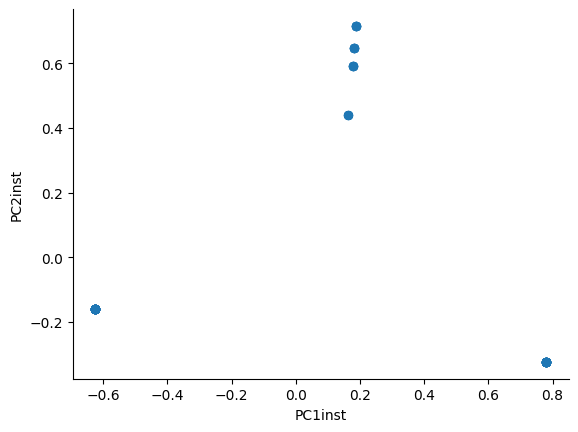

In [11]:


from matplotlib import pyplot as plt
reduced_instrument_df.plot(kind='scatter', x='PC1inst', y='PC2inst', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
reduced_style = pca(style_bow)
reduced_style_df = pd.DataFrame(reduced_style, columns=['PC1style', 'PC2style'])
reduced_style_df['song_id'] = songid
reduced_style_df.head()



,PC1style,PC2style,song_id
0,-0.015481,-0.061795,74
1,-0.647926,0.544305,103
2,-0.018821,-0.077482,201
3,-0.019894,-0.082733,194
4,-0.076878,-0.694875,184


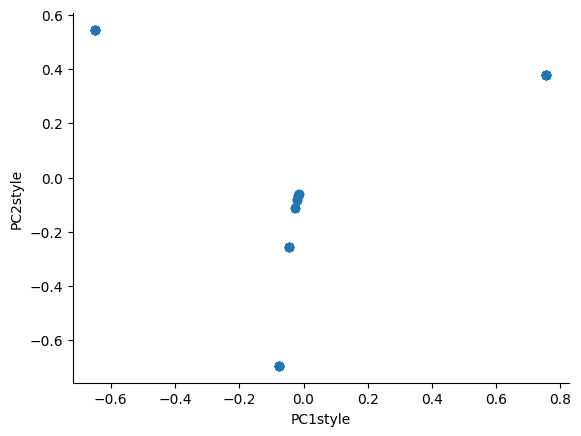

In [13]:


from matplotlib import pyplot as plt
reduced_style_df.plot(kind='scatter', x='PC1style', y='PC2style', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
reduced_mood = pca(mood_bow)
reduced_mood_df = pd.DataFrame(reduced_mood, columns=['PC1mood', 'PC2mood'])
reduced_mood_df['song_id'] = songid
reduced_mood_df.head()



,PC1mood,PC2mood,song_id
0,-0.815557,-0.136695,74
1,0.277452,0.748988,103
2,-0.815557,-0.136695,201
3,0.277452,0.748988,194
4,0.277452,0.748988,184


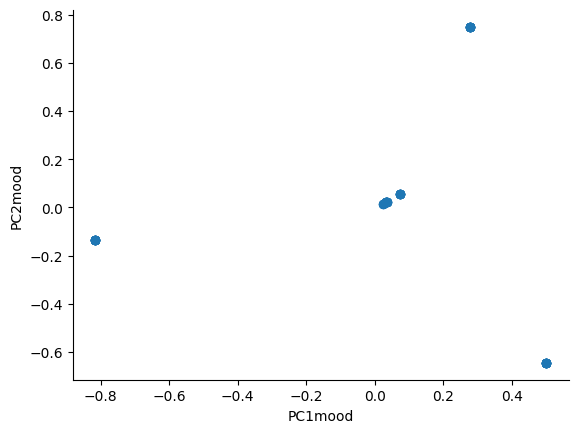

In [15]:


from matplotlib import pyplot as plt
reduced_mood_df.plot(kind='scatter', x='PC1mood', y='PC2mood', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

COMBINING THE EMBEDDINGS INTO ONE

Currently, we have three different vectors per song and this can become very messy and inefficient.
We must combine these into a single embedding per song to make the workflow easier.
The method used is averaging.

In [16]:
stacked_embeddings = np.array([reduced_instrument, reduced_mood, reduced_style]) 
final_embedding = np.mean(stacked_embeddings, axis=0) #mean along axis 0 is computed

final_embedding_df = pd.DataFrame(final_embedding, columns=['PC1_avg', 'PC2_avg'])
final_embedding_df['song_id'] = songid

final_embedding_df.head()

,PC1_avg,PC2_avg,song_id
0,-0.485078,-0.119380,74
1,-0.062615,0.647452,103
2,-0.223757,0.075885,201
3,0.345979,0.114004,194
4,0.326985,-0.090043,184


CLUSTERING USING K MEANS


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# K-Means clustering 
def kmeans(X, k, max_iters=100, tol=1e-4):   #X is the vector and k is the optimal value of k
    
    np.random.seed(42)  # For getting the same results everytime (42 is the convention)
    num_samples, num_features = X.shape

    #first choose random centroids
    centroids = X[np.random.choice(num_samples, k, replace=False)]

    for i in range(max_iters):
        #assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Euclidean distance
        labels = np.argmin(distances, axis=1)

        #compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        #check if centroids don’t change much
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    #compute wcss
    wcss = sum(np.min(distances, axis=1) ** 2)
    
    return centroids, labels, wcss

# try different values of K and store wcss values

wcss_values = []
K_values = range(1, 11)  #Testing K from 1 to 10

for k in K_values:
    centroids, labels, wcss = kmeans(final_embedding, k)
    wcss_values.append(wcss)



C:\Users\aarya\AppData\Local\Temp\ipykernel_15744\1254912147.py:19: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])


According to the curve below, we see that the curve bends like an elbow at k = 3. Thus, the optimal value of k is 3, according to the elbow method.

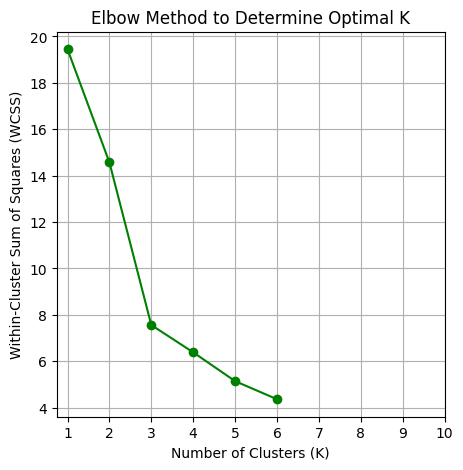

In [34]:
#Plot the Elbow Curve
plt.figure(figsize=(5, 5))
plt.plot(K_values, wcss_values, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.xticks(K_values)
plt.grid()
plt.show()


Now, that we have the optimal k value for the k means clustering, we can run it with the optimal value to get the best posssible outcome.
Now, we can plot the curve to visualize the distribution of the final set of clusters.

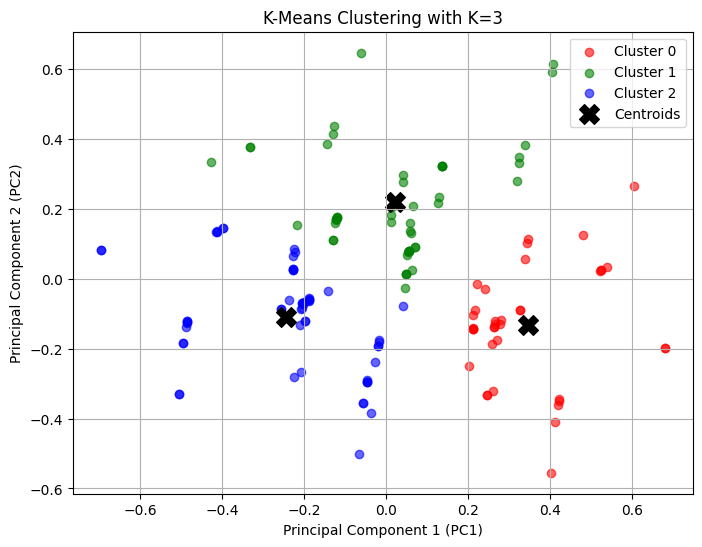

In [ ]:
#PLOTTING THE CLUSTERS AFTER  IMPLEMENTING K MEANS CLUSTERING USING THE OPTIMAL K VALUE


optimal_k = 3  


centroids, labels, _ = kmeans(final_embedding, optimal_k)


clustered_data = pd.DataFrame(final_embedding, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = labels  

#Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

for cluster_id in range(optimal_k):
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster_id]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1],   #We are plotting the centroids as well
            color='black', marker='X', s=200, label='Centroids')


plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.legend()
plt.grid()
plt.show()


ANALYSIS:


Now, i will be assessing the accuracy of my clustering:-
1. **What is the percentage distribution of ground truth genres in each cluster?**
  First, I will create a dataframe to compare ground truth genres and assigned clusters first to get a visualisation.

In [36]:
clustered_data = pd.DataFrame(final_embedding, columns=['PC1', 'PC2'])
centroids, labels, _ = kmeans(final_embedding, optimal_k)
clustered_data['Cluster'] = labels  
clustered_data.insert(0, 'song id', df["song_id"], allow_duplicates=False)
clustered_data.insert(4, 'true genre', df["genre"], allow_duplicates=False)
clustered_data.head()

,song id,PC1,PC2,Cluster,true genre
0,74,-0.485078,-0.119380,2,rock
1,103,-0.062615,0.647452,1,classical
2,201,-0.223757,0.075885,2,country
3,194,0.345979,0.114004,0,hip-hop
4,184,0.326985,-0.090043,0,hip-hop


2. Next, I will analyse the percentage distribution of each genre in the predicted clusters. This will help us to find overlaps as well.

In [37]:
genre_distribution = clustered_data.groupby('Cluster')['true genre'].value_counts(normalize=True) * 100
print(genre_distribution)

Cluster  true genre
0        hip-hop       57.894737
         pop           26.315789
         classical      7.894737
         country        5.263158
         rock           2.631579
1        classical     41.176471
         pop           21.568627
         country       15.686275
         rock          15.686275
         hip-hop        5.882353
2        rock          36.206897
         country       32.758621
         pop           17.241379
         hip-hop        8.620690
         classical      5.172414
Name: proportion, dtype: float64


3. **Silhouette score:**
We will calculate the silhouette score for each data poit and then find the average silhouette score. The function that i have defined below will use the formual for silhouette score which is: 
S(i)=( b(i)−a(i))/ max(a(i),b(i))
a is the average distance between a sample and other data points in the same cluster, and b is the average distance between a sample and other data points in the nearest cluster. 


In [38]:
# X: final_embedding
# labels: labels of the cluster 
def silhouette_score(X, labels):
    unique_clusters = np.unique(labels)
    number_of_samples = X.shape[0]       # extracts the number of rows in X i.e the number of songs
    silhouette_scores = np.zeros(number_of_samples)   # to store the silhouette scores
    
    for i in range(number_of_samples):   # iterate through each song
        current_cluster = labels[i]
        in_cluster = X[labels == current_cluster]   # find songs that belong to the cluster of the current song
        
        # computing a (intra cluster distance)
        if len(in_cluster) > 1:
            a_i = np.mean(np.linalg.norm(in_cluster - X[i], axis=1))
        else:
            a_i = 0

        # computing b (inter cluster distance)
        b_i = np.inf
        for cluster in unique_clusters:
            if cluster != current_cluster:
                other_cluster = X[labels == cluster]
                mean_distance = np.mean(np.linalg.norm(other_cluster - X[i], axis=1))
                if mean_distance < b_i:
                    b_i = mean_distance   # to get the closest cluster

        # computing silhouette score for the current point
        if a_i + b_i > 0:
            silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)
        else:
            silhouette_scores[i] = 0

    return silhouette_scores

silhouette_scores = silhouette_score(final_embedding, labels)
average_silhouette_score = np.mean(silhouette_scores)
print("Average Silhouette Score:", average_silhouette_score)


Average Silhouette Score: 0.42393738893175875


Dataframe to display the silhouette score for each data point:

In [39]:
#just added a column displaying silhouette score in my previous clustered data dataframe
clustered_data['silhouette score'] = silhouette_scores
clustered_data.head()


,song id,PC1,PC2,Cluster,true genre,silhouette score
0,74,-0.485078,-0.119380,2,rock,0.520042
1,103,-0.062615,0.647452,1,classical,0.401733
2,201,-0.223757,0.075885,2,country,0.220657
3,194,0.345979,0.114004,0,hip-hop,0.243539
4,184,0.326985,-0.090043,0,hip-hop,0.600320


Now, i need to develop a technique to assign a genre to a **new** song if its keywords are given. We can do this using the clusters that we have found.
My approach:
1. First we find the cluster that it "fits into" the best. This could be the cluster from which its euclidean distance is minimum.
2. Now that we have assigned a cluster, to assign a genre we find the genre having the **highest frequency** in **that** cluster.


In [40]:
# data of new songs that we are working with:
new_songs = np.array([["piano", "calm", "slow"],
    ["guitar", "emotional", "distorted"],
    ["synth", "mellow", "distorted"]])
indexes = ['new_0','new_1','new_2']
new_songs_df = pd.DataFrame(new_songs, index = indexes,columns=['instrument', 'mood', 'style'])
new_songs_df.head()



#assign to nearest cluster

#find the most common genre in that cluster

,instrument,mood,style
new_0,piano,calm,slow
new_1,guitar,emotional,distorted
new_2,synth,mellow,distorted


In [41]:
new_inst_bow = np.zeros((len(new_songs_df), len(instruments_vocab)), dtype = int)

for idx, inst in enumerate(new_songs_df['instrument']):
  for i, word in enumerate(instruments_vocab):
    if inst == word:
      new_inst_bow[idx, i] = 1
new_inst_bow_df= pd.DataFrame(new_inst_bow, columns = instruments_vocab) 
new_inst_bow_df.head()

,guitar,brass,banjo,synth,violin,piano
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0


In [42]:
new_style_bow = np.zeros((len(new_songs_df), len(style_vocab)), dtype = int)

for idx, sty in enumerate(new_songs_df['style']):
  for i, word in enumerate(style_vocab):
    if sty == word:
      new_style_bow[idx, i] = 1
new_style_bow_df = pd.DataFrame(new_style_bow, columns = style_vocab) 
new_style_bow_df.head()

,distorted,melodic,acoustic,heavy,slow,upbeat,rhythmic,twangy,fast,danceable
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0


In [43]:
new_mood_bow = np.zeros((len(new_songs_df), len(mood_vocab)), dtype = int)

for idx, mood in enumerate(new_songs_df['mood']):
  for i, word in enumerate(mood_vocab):
    if mood == word:
      new_mood_bow[idx, i] = 1
new_mood_bow_df = pd.DataFrame(new_mood_bow, columns = mood_vocab) 
new_mood_bow_df.head()



,happy,energetic,calm,mellow,emotional,nostalgic,angry,sad,upbeat
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0


In [44]:
new_reduced_instrument = pca(new_inst_bow)
new_reduced_mood = pca(new_mood_bow)
new_reduced_style = pca(new_style_bow)

In [45]:
combined_embeddings = np.array([new_reduced_instrument, new_reduced_mood, new_reduced_style]) 
new_final_embedding = np.mean(combined_embeddings, axis=0) #mean along axis 0 is computed

new_final_embedding_df = pd.DataFrame(new_final_embedding, columns=['PC1_avg', 'PC2_avg'])


new_final_embedding_df.head()

,PC1_avg,PC2_avg
0,-0.065950,0.379617
1,0.086472,-0.243220
2,-0.020521,-0.136397


Now we will find the cluster it is closest to

In [ ]:
def find_nearest_cluster(new_vector, centroids):
    distances = np.linalg.norm(centroids - new_vector, axis=1)
    return np.argmin(distances) #index of the closest cluster

def predict_genre(new_vector, centroids, clustered_data):
    cluster_id = find_nearest_cluster(new_vector, centroids)
    genre_counts = clustered_data[clustered_data["Cluster"] == cluster_id]["true genre"].value_counts()
    predicted_genre = genre_counts.idxmax()  # Most frequent genre in the cluster
    return predicted_genre


#results


predicted_genres = [predict_genre(vect, centroids, clustered_data) for vect in new_final_embedding]
print(predicted_genres)
predicted_genres_df = pd.DataFrame(predicted_genres, index = indexes, columns = ['predicted genre'])

predicted_genres_df['Instrument'] = new_songs_df['instrument']
predicted_genres_df['Mood'] = new_songs_df['mood']
predicted_genres_df['Style'] = new_songs_df['style']

predicted_genres_df.head()

['classical', 'hip-hop', 'rock']


,predicted genre,Instrument,Mood,Style
new_0,classical,piano,calm,slow
new_1,hip-hop,guitar,emotional,distorted
new_2,rock,synth,mellow,distorted
